In [29]:
import os
#os.chdir('../')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.metrics import mean_squared_error
from datamodel import Listing, Observation, Order, OrderDepth, ProsperityEncoder, Symbol, Trade, TradingState, ConversionObservation


data_1 = pd.read_csv('data/prices_round_4_day_1.csv', sep =";")
data_2 = pd.read_csv('data/prices_round_4_day_2.csv', sep =";")
data_3 = pd.read_csv('data/prices_round_4_day_3.csv', sep =";")

data=[data_1, data_2, data_3]
data= pd.concat(data)
data.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999.0,200.0,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
1,1,0,COCONUT_COUPON,637.0,39.0,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
2,1,100,COCONUT,9999.0,104.0,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
3,1,100,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
4,1,200,COCONUT,9998.0,133.0,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0


In [30]:
#create 4 different dataframes from data for each product CHOCOLATE, STRAWBERRY, ROSES, GIFT_BASKET
data_coconut = data[data['product'] == 'COCONUT'].reset_index(drop=True)
data_coupon = data[data['product'] == 'COCONUT_COUPON'].reset_index(drop=True)



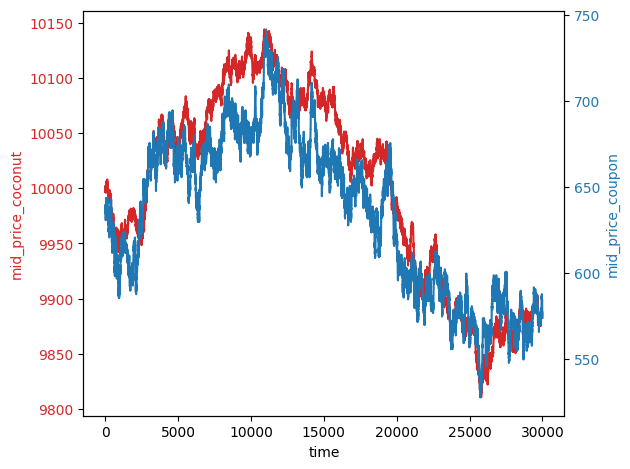

In [34]:
#plot data_coconut['mid_price'] and data_coupon['mid_price'] on the same graph with 2 different y axis
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price_coconut', color=color)
ax1.plot(data_coconut['mid_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('mid_price_coupon', color=color)  # we already handled the x-label with ax1
ax2.plot(data_coupon['mid_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [33]:
#calculate correlation between data_coconut['mid_price'] and data_coupon['mid_price']
correlation = data_coconut['mid_price'].corr(data_coupon['mid_price'])
print(correlation)

0.9578693347968137
